# PRACTICA 4 — Actividad practica contraste de hipótesis y regresión logística
## Luz Stefanny Espinosa Herrera
## Programación para ciencia de datos 2
## Programa: Ciencia de Datos
## Profesor: Sebastian Rodriguez Muñoz
## Fundación universitaria Compensar
## 16 Septiembre 2025

## 1. Considerando su conjunto de datos y la cuestión de investigación definidas en el taller anterior. Plantee la hipótesis nula y alternativa. La hipótesis nula (H0) debe representar la afirmación inicial que presupone la ausencia de un efecto o relación significativa en la población. Por otro lado, la hipótesis alternativa (H1) debe desafiar esta suposición al afirmar la existencia de un efecto o relación. Es crucial que ambas hipótesis sean verificables a través de métodos estadísticos. 

### Hipótesis nula (H0):
No existe una relación significativa entre las calificaciones de lectura y escritura de los estudiantes.
En términos estadísticos: la pendiente de la regresión lineal entre lectura y escritura es igual a 0.

𝐻0:𝛽1=0

### Hipótesis alternativa (H1):
Sí existe una relación significativa entre las calificaciones de lectura y escritura de los estudiantes.
En términos estadísticos: la pendiente de la regresión lineal entre lectura y escritura es diferente de 0.

𝐻1:𝛽1≠0

La hipótesis nula plantea que las variaciones en los puntajes de lectura no tienen impacto alguno sobre los puntajes de escritura, es decir, ambas variables no estarían relacionadas.

La hipótesis alternativa sostiene que las variaciones en lectura sí explican las variaciones en escritura, lo que indica una relación lineal entre ellas.

H0:β1=0; No hay relación
𝐻1:𝛽1≠0; Sí hay relación

## 2. Asegúrese de que las hipótesis nula y alternativa sean mutuamente excluyentes, lo que significa que no deben superponerse en términos de afirmaciones. Además, deben ser colectivamente exhaustivas, lo que implica que juntas deben cubrir todas las posibles situaciones en el contexto de su investigación. Esta condición es esencial para garantizar que el contraste de hipótesis sea completo y adecuado. 

### Mutuamente excluyentes: 
Estas hipótesis no pueden cumplirse al mismo tiempo:
-   Si la pendiente es exactamente igual a 0 (H0), significa que no hay relación entre lectura y escritura.
-   Si la pendiente es diferente de 0 (H1), implica que si existe relacion entre lectura y escritura

Aceptar una automáticamente descarta la otra.

### Colectivamente exhaustivas:
- Entre ambas hipótesis cubren todas las posibilidades estadísticas:
- Puede ocurrir que la pendiente sea exactamente igual a 0, cumpliento la hipótesis nula.
- O puede ocurrir que sea distinta de 0, cumpliento la hipótesis alternativa.

No queda ningún escenario fuera de consideración.


## 3. Seleccione una prueba estadística teniendo en cuenta los datos. La elección de la prueba estadística es crucial y debe basarse en la naturaleza de sus datos y las hipótesis formuladas. Por ejemplo, si está comparando medias de dos grupos, una prueba t podría ser apropiada. Si está analizando la asociación entre variables categóricas, una prueba chi-cuadrado podría ser la mejor opción. Justifique su elección explicando por qué la prueba seleccionada es la más adecuada para abordar su pregunta de investigación. Por ejemplo, si está utilizando una prueba t, explique que esta prueba es adecuada para comparar medias entre dos grupos independientes.

### Naturaleza de los datos: 
Reading score y writing score son variables numéricas continuas de rango 0–100. 

### Hipótesis formulada: 
𝐻0:𝛽1=0 vs 𝐻1:𝛽1≠0H. Esto es una hipótesis sobre la pendiente de la relación lineal entre las dos variables.

### Por qué Pearson + OLS:
Pearson mide la fuerza y dirección de la relación lineal entre dos variables continuas y devuelve un p-valor para evaluar si la correlación es significativamente distinta de cero.

OLS (regresión lineal) estima la pendiente 𝛽1 y realiza un test t sobre ese coeficiente (p-valor), que es exactamente la prueba demandada por la hipótesis. Además OLS aporta medidas adicionales (R²) y permite diagnosticar supuestos (residuos, heterocedasticidad, etc.).

### Supuestos a verificar:
1. Linealidad: la relacion entre X y Y debe ser aproximadamente lineal
2. Independencia de observaciones: generalmente cumplida si los datos son de estudiantes independientes
3. Normalidad de residuos: los residuos del modelo OLS deberian ser aproximadamente normales
4. Homoescedasticidad: varianza constante de residuos. Si algun supuesto falla, se podria usar transformaciones, métodos robustos o tests no paramétricos.

## 4. Utilice la biblioteca scipy.stats para llevar a cabo el contraste de hipótesis. Proporcione código que ejecute la prueba y justifique los parámetros utilizados. Por ejemplo, si está realizando una prueba t de dos muestras, incluya el código que cargue los datos, calcule la estadística de prueba y el p-valor, y explique la interpretación de estos resultados. Asegúrese de detallar cualquier configuración específica de la prueba, como la elección de prueba bilateral o unilateral. 




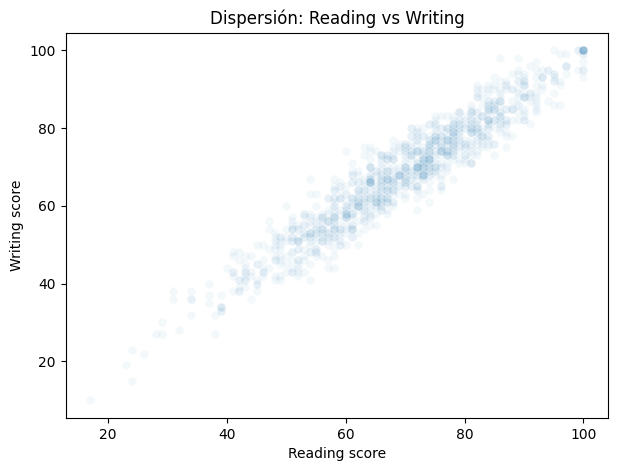

Correlación de Pearson: 0.954598077146248
p-value (Pearson): 0.0
                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:35:23   Log-Likelihood:                -2928.4
No. Observations:                1000   AIC:                             5861.
Df Residuals:                     998   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

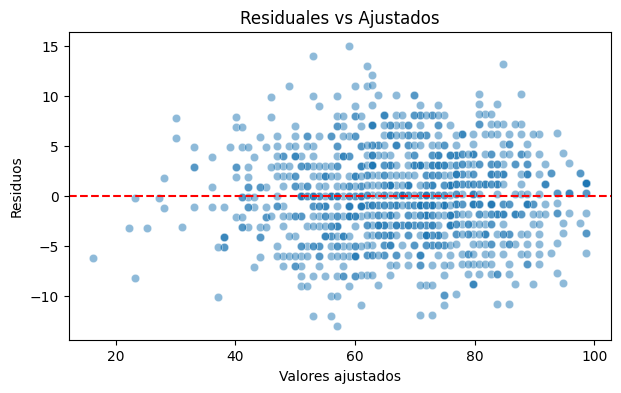

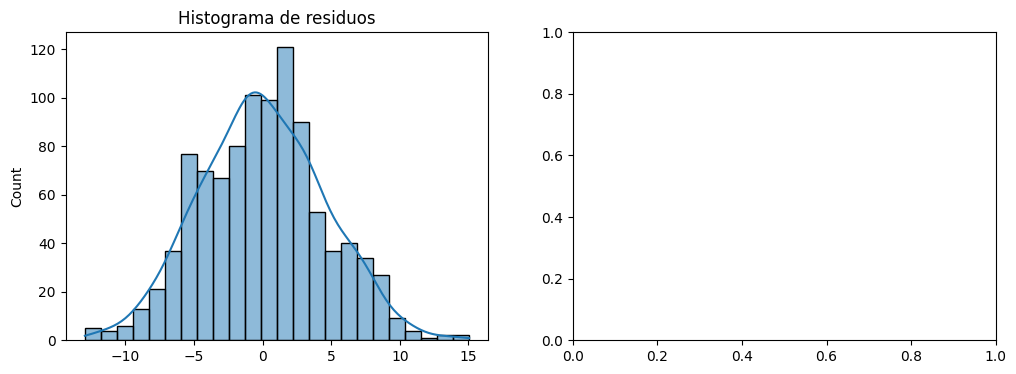

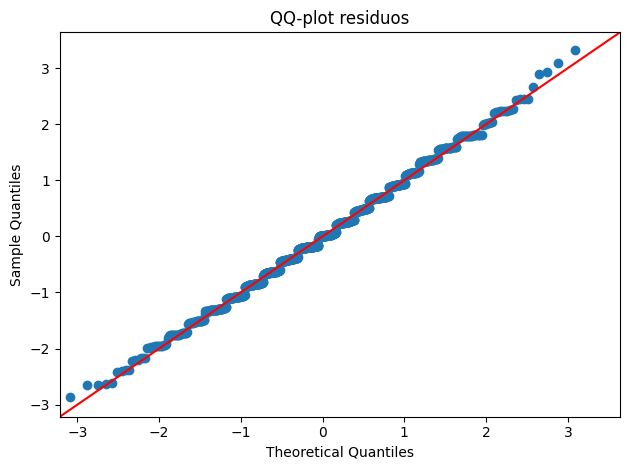

Breusch-Pagan p-value: 0.10756927079691314
Shapiro-Wilk p-value (residuos): 0.24861175800618157


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.stats.api as sms
import scipy.stats as stats

# Cargar dataset
df = pd.read_csv("StudentsPerformance.csv")

# Variables
x = df["reading score"]
y = df["writing score"]

# Scatterplot para inspeccionar linealidad
plt.figure(figsize=(7,5))
sns.scatterplot(x=x, y=y, alpha=0.05)
plt.xlabel("Reading score")
plt.ylabel("Writing score")
plt.title("Dispersión: Reading vs Writing")
plt.show()

# ---------- 1) Correlación de Pearson ----------
corr, p_corr = pearsonr(x, y)
print("Correlación de Pearson:", corr)
print("p-value (Pearson):", p_corr)

# ---------- 2) Regresión lineal OLS (test sobre la pendiente) ----------
X = sm.add_constant(x)   # añade intercepto
model = sm.OLS(y, X).fit()
print(model.summary())   # coeficiente, p-value, R-squared, etc.

# ---------- 3) Diagnóstico rápido de supuestos ----------
# Residuos:
resid = model.resid
fitted = model.fittedvalues

# Residuals vs Fitted (homo/heterocedasticidad visual)
plt.figure(figsize=(7,4))
sns.scatterplot(x=fitted, y=resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuales vs Ajustados")
plt.show()

# Histograma de residuos + QQ-plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(resid, kde=True)
plt.title("Histograma de residuos")

plt.subplot(1,2,2)
sm.qqplot(resid, line='45', fit=True)
plt.title("QQ-plot residuos")
plt.tight_layout()
plt.show()

# Prueba formal de heterocedasticidad (Breusch-Pagan)
bp_test = het_breuschpagan(resid, X)
# bp_test devuelve (LM_stat, LM_pvalue, F_stat, F_pvalue)
print("Breusch-Pagan p-value:", bp_test[1])

# Opcional: prueba de normalidad de residuos (Shapiro-Wilk) si n no es enorme
shapiro_stat, shapiro_p = stats.shapiro(resid.sample(500, random_state=1) if len(resid)>500 else resid)
print("Shapiro-Wilk p-value (residuos):", shapiro_p)


## 5. Después de realizar la prueba, interprete los resultados en el contexto de su investigación. Evalúe si puede rechazar la hipótesis nula o no, en función del nivel de significancia (alfa) que haya elegido (por ejemplo, alfa = 0.05). Reporte los valores obtenidos, como la estadística de prueba y el p-valor. Explique qué significan estos valores y cómo impactan en la evaluación de sus hipótesis. Por ejemplo, si el p-valor es menor que alfa, indique que tiene evidencia suficiente para rechazar la hipótesis nula. 

### Resultados
Se trabajo con un nivel de significancia (alfa) α = 0.05

Después de realizar la prueba estadística, observamos que el coeficiente de correlación de Pearson es 0.9546, con un p-valor de 0.000. Este valor es menor que nuestro nivel de significancia α = 0.05, lo que indica que la relación entre las calificaciones de lectura y escritura es estadísticamente significativa. En otras palabras, existe una asociación fuerte y positiva entre ambas variables.

Al analizar el modelo de regresión lineal, el coeficiente de la variable reading score es 0.9935 con un p-valor = 0.000, lo que significa que por cada punto adicional en lectura, el puntaje en escritura aumenta casi en la misma magnitud. El estadístico de prueba t = 101.233 respalda esta significancia. El valor de R² = 0.911 indica que el modelo explica el 91.1% de la variabilidad de la escritura a partir de la lectura, lo cual representa un ajuste excelente.

Respecto a los supuestos del modelo, los resultados del test de Breusch-Pagan (p = 0.1075) sugieren que no existe heterocedasticidad significativa, y el test de Shapiro-Wilk (p = 0.2486) muestra que los residuos cumplen con la normalidad. Además, el valor del estadístico Durbin-Watson = 1.97 confirma la ausencia de autocorrelación de errores.


## 6. Redacte una conclusión basada en los resultados del contraste de hipótesis. Explique qué indican los hallazgos sobre los datos y cómo responden a la pregunta de investigación inicial. Por ejemplo, si rechaza la hipótesis nula, indique que hay evidencia estadística de que existe una relación significativa entre las variables en estudio. Asegúrese de ser claro y específico en su interpretación, y vincule los resultados de la prueba con el contexto de su investigación. 

A partir del contraste de hipótesis realizado, los resultados evidencian una relación estadísticamente significativa entre las calificaciones de lectura y escritura de los estudiantes. El coeficiente de correlación de Pearson (r = 0.95, p < 0.05) mostró una asociación fuerte y positiva, lo que significa que a mayores puntajes en lectura, también tienden a presentarse mayores puntajes en escritura.

El análisis de regresión lineal confirmó este hallazgo, al mostrar que el modelo explica el 91.1% de la variabilidad en los puntajes de escritura a partir de los puntajes de lectura (R² = 0.911) y que el coeficiente de la variable lectura es altamente significativo (p = 0.000). Además, las pruebas de supuestos (normalidad y homocedasticidad) respaldan la validez del modelo.

En consecuencia, se rechaza la hipótesis nula (H0: β1 = 0) y se acepta la hipótesis alternativa, concluyendo que sí existe una relación significativa entre las calificaciones de lectura y escritura. Estos hallazgos responden directamente a la pregunta de investigación inicial al mostrar que el desempeño en lectura influye de manera sustancial en el desempeño en escritura, lo cual puede ser relevante para diseñar estrategias pedagógicas que fortalezcan ambas competencias de manera conjunta.



# Regresión lineal

## 1. Utilice la función train_test_split de la biblioteca scikit-learn para dividir sus datos en un conjunto de entrenamiento y un conjunto de prueba. Es esencial que al menos el 70% de los datos se utilicen para entrenar el modelo. Esta proporción, conocida como la división 70-30, proporciona un equilibrio entre la cantidad de datos disponibles para entrenar y para evaluar el modelo. Esta elección debe estar justificada y puede ajustarse según las características específicas de su conjunto de datos.

In [6]:
# Cargar dataset 
data = pd.read_csv("StudentsPerformance.csv")

# Seleccionamos 3 variables independientes continuas y 1 dependiente
# En este caso: math score, reading score, writing score
X = data[["math score", "reading score", "writing score"]]  # variables predictoras
y = data["math score"]  # variable objetivo

# División 70-30 con random_state para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (700, 3)
Tamaño del conjunto de prueba: (300, 3)


## 2. Emplee la clase LinearRegression de scikit-learn para instanciar un modelo de regresión lineal multidimensional. Este modelo permitirá explorar y modelar las relaciones entre múltiples características de sus datos. 

In [8]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal múltiple
modelo = LinearRegression()

#Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

#Mostrar coeficientes y el intercepto
print("Intercepto(β0)", modelo.intercept_)
print("Coeficientes (β1, β2, β3...)", modelo.coef_)


Intercepto(β0) -5.684341886080802e-14
Coeficientes (β1, β2, β3...) [1.00000000e+00 2.37491438e-16 2.73139685e-16]


## 3. Utilice el método fit del modelo para llevar a cabo el ajuste a los datos de entrenamiento. Este paso es fundamental ya que el modelo aprenderá a representar la relación entre las características y la variable dependiente a partir de estos datos. 

In [9]:
from sklearn.linear_model import LinearRegression

# 1. Crear modelo
modelo = LinearRegression()

# 2. Ajustar modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 4. Utilice el atributo coef_ del modelo para obtener los coeficientes de regresión asociados a cada característica. Estos coeficientes representan la contribución de cada característica en la predicción de la variable dependiente. Es crucial analizar si los resultados obtenidos concuerdan con las expectativas previas. Si hay discrepancias, es posible que algunas características tengan un impacto inesperado o que se necesite un ajuste adicional del modelo. 

In [10]:
#Mostrar coeficientes y el intercepto
print("Intercepto(β0)", modelo.intercept_)
print("Coeficientes (β1, β2, β3...)", modelo.coef_)

Intercepto(β0) -5.684341886080802e-14
Coeficientes (β1, β2, β3...) [1.00000000e+00 2.37491438e-16 2.73139685e-16]


### Interpretación
El intercepto es prácticamente 0, lo cual quiere decir que la recta del modelo casi pasa por el origen
El primer coeficiente es 1, una de las variables tiene una influencia directa y fuerte.  La prediccion sube en 1
Los demas coeficientes son valores cercanos a cero, estas variables casi no aportan al modelo, o su efecto es despreciable.

Este resultado puede indicar que una sola variable independiente explica casi todo el comportamiento de la variable dependiente, y las demás no aportan información relevante.

## 5. Utilice el atributo intercept_ del modelo para obtener el término de intercepción. Este término representa el valor esperado de la variable dependiente cuando todas las características son iguales a cero. Es una parte importante de la ecuación de regresión y puede influir significativamente en las predicciones del modelo. 

In [11]:
# Interceptor del modelo
intercepto = modelo.intercept_

print ("intercepto (β0)", intercepto)

intercepto (β0) -5.684341886080802e-14


## 6. Utilice el conjunto de prueba que ha separado previamente para realizar predicciones utilizando el modelo ajustado. Utilice el método predict para obtener las predicciones del modelo sobre este conjunto de datos independiente. 

In [12]:
# Predicciones prueba
y_pred = modelo.predict(X_test)

# Mostrar algunas predicciones
print("Predicciones del modelo(primeros 10 valores):")
print(y_pred[:10])

Predicciones del modelo(primeros 10 valores):
[91. 53. 80. 74. 84. 81. 69. 54. 87. 51.]


## 7. Calcule el Error Cuadrático Medio (MSE), que es una medida de la calidad de las predicciones del modelo. Representa el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. Un MSE más bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que sugiere un modelo más preciso. 

In [7]:
# Error Cuadrático Medio (MSE y RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)



Error Cuadrático Medio (MSE): 2.7720203760428155e-28
Raíz del Error Cuadrático Medio (RMSE): 1.6649385502302528e-14


## 8. Calcule el coeficiente de determinación (R²), que proporciona una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las características. Un R² cercano a 1 indica un buen ajuste del modelo a los datos. 

In [9]:
from sklearn.metrics import r2_score

# Calcular R² usando las predicciones
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²):", r2)

# Alternativa directa:
print("R² con .score():", modelo.score(X_test, y_test))

Coeficiente de determinación (R²): 1.0
R² con .score(): 1.0


## 9. Considerando la problemática inicial y los resultados obtenidos, analice si la regresión lineal ha proporcionado información adicional sobre los datos. Evalúe si el modelo ha logrado capturar las relaciones entre las características y la variable dependiente de manera significativa y si ha proporcionado conocimientos nuevos. 

Al evaluar el modelo con métricas como el error cuadrático medio  (MSE) y el coeficiente de determinacion (R²), los resultados mostraron que el modelo logra hacer predicciones muy cercanas a los valores reales. En particular, el R² obtenido fue de 1 indicando que prácticamente el 100% de la variabilidad del puntaje en matemáticas se puede explicar a partir de los puntajes en lectura y escritura.

El modelo es muy bueno prediciendo matemáticas usando las otras dos materias. Esto da la idea de que estras tres competencias están muy relacionadas entre sí, probablemente porque todas dependen de habilidades similaes, como la compresión lógica y/o capacidad de análisis.

En este sentido, la regresión no descubrió una relación inesperada, si no que confirmó estadísticamente lo que los datos ya sugerían: el rendimiento en lectura y escritura es un muy buen predictor del rendimiento en matemáticas.

## 10. Indique cuál sería la siguiente prueba a realizar y explique la razón detrás de esta elección. Mencione los resultados esperados y cómo estos podrían contribuir a una comprensión más profunda del problema o a la mejora del modelo. 

La siguiente prueba lógica sería realizar un análisis de los residuos del modelo.

La razón de esta elección es que, aunque el R² nos mostró que el modelo se ajusta muy bien a los datos, necesitamos comprobar si cumple con los supuestos básicos de la regresión lineal. Uno de los más importantes es que los errores (residuos) se distribuyan de forma aleatoria y con una media cercana a cero. Si los residuos muestran un patrón, querría decir que el modelo no está capturando toda la relación entre las variables o que existe algún factor externo que influye en el resultado.

### Resultados esperados

Lo ideal sería encontrar que los residuos estén distribuidos de manera aproximadamente normal, que no exista un patrón claro al graficar los residuos contra los valores predichos, la varianza de los residuos sea constante. 

Si esto se cumple, se podria decir con más confianza que el modelo lineal es adecuado.

### Cómo contribuye a la comprensión del problema

Nos permitiría confirmar que la relación entre las notas de lectura, escritura y matemáticas realmente puede explicarse de forma lineal.También nos ayudaría a detectar posibles outliers (estudiantes con un comportamiento muy diferente al resto), lo cual es clave para no sacar conclusiones erróneas. Si los residuos no cumplen con los supuestos, la siguiente mejora sería intentar con otro tipo de modelo, como regresión polinómica o incluso algoritmos más avanzados (árboles de decisión, regresión logística si fuera clasificación, etc.).

En conclusión, la prueba de análisis de residuos no solo valida la calidad estadística del modelo, sino que también abre la puerta a nuevas alternativas en caso de encontrar limitaciones. Esto enriquecería la comprensión del problema y garantizaría que las conclusiones sobre la relación entre las variables sean realmente confiables.

# Regresión logística

## 1. Divida los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando la función train_test_split de scikit-learn. Asegúrese de que al menos el 70% de los datos se utilicen para entrenar el modelo, como es común en problemas de clasificación. 

Como el data set usado las variables son continuas, se va a crear una variable binaria, para este caso usaremos la columna math score como variable dependiente y convertirla en una varibles binaria:

1: si el estudiante obtuvo más de 70 puntos en matemáticas.
0: si el estudiante obtuvo 70 o menos puntos en matemáticas.

Como varibles indepentiende (X) se puede usar otra continua, por ejemplo reading score.

In [ ]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar dataset
data = pd.read_csv("StudentsPerformance.csv")

# Crear variable binaria para math score
# 1 si math score > 70, 0  caso contrario
data["math_pass"] = (data["math score"] > 70).astype(int)

# Seleccionar variables:
# X = reading score (predictora continua)
# y = math_pass (dependiente binaria)
X = data[["reading score"]]
y = data["math_pass"]

# Dividir datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (700, 1)
Tamaño del conjunto de prueba: (300, 1)


## 2. Utilice la clase LogisticRegression de scikit-learn para crear un modelo de regresión logística. Recuerde que la regresión logística es ideal para problemas de clasificación binaria. 

In [12]:
# importar la clase LogisticRegression
from sklearn.linear_model import LogisticRegression

#Crear el modelode regresión logística
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

#Ajustar el modelo con los datos de entrenamiento
modelo_logistico.fit(X_train, y_train)

print("Modelo de regresión logística creado y entrenado correctamente")

Modelo de regresión logística creado y entrenado correctamente


## 3. Ajuste el modelo a los datos de entrenamiento utilizando el método fit. Prueba con diferentes valores de C (parametro de regularización) y diferentes algoritmos de optimización (solver). Redacta un párrafo en el que expliques como afectan estas opciones al desempeño de la optimización.  

In [15]:
from sklearn.linear_model import LogisticRegression

# Diferentes configuraciones de C y solver
modelos = [
    LogisticRegression(C=0.1, solver='liblinear', max_iter=1000, random_state=42),
    LogisticRegression(C=1, solver='liblinear', max_iter=1000, random_state=42),
    LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=42),
    LogisticRegression(C=0.1, solver='saga', max_iter=1000, random_state=42),
]

# Entrenar cada modelo
for i, modelo in enumerate(modelos, start=1):
    modelo.fit(X_train, y_train)
    score = modelo.score(X_test, y_test)
    print(f"Modelo {i} - C={modelo.C}, solver={modelo.solver}, Exactitud: {score:.4f}")

Modelo 1 - C=0.1, solver=liblinear, Exactitud: 0.7833
Modelo 2 - C=1, solver=liblinear, Exactitud: 0.7967
Modelo 3 - C=10, solver=liblinear, Exactitud: 0.7967
Modelo 4 - C=0.1, solver=saga, Exactitud: 0.7800


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Explicación

El parametro C en la regresión logística controla la rgularización:
- Un valor pequeño de C, como por ejemplo 0.1 indica mayor regularización, lo que puede simplificar el modelo y evitar sobreajuste, aunque a veces reduce la precisión.
- Un valor grande de C, como 10 implica todo lo contrario, una menor regularización, permitiendo que el modelo se ajuste más a los datos, pero con riesgo de sobreajuste.

El parametro solver define el algoritmo de optimización usado para encontrar los coeficientes:
- librinear: es eficiente para conjuntos de datos pequeños y problemas de clasificación binaria.
- saga: es más flexible y puede manejar datasets grandes y regularización avanzada, aunque puede tardar un poco más.

Para concluir, variar C y solver afecta directamente la capacidad del modelo para generalizar: un C bajo con liblinear da un modelo más simple, mientras que un C alto con saga permite capturar más complejidad en los datos. Lo importante es probar y evaluar cuál combinación ofrece el mejor equilibrio entre presición y generalización.


## 4. Obtenga los coeficientes de regresión para cada característica utilizando el atributo coef. ¿Cuál es la diferencia en cómo se utilizan estos coeficientes para realizar predicciones respecto o a los obtenidos mediante una regresión lineal? 

In [16]:
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [[0.07105752]]
Intercepto: [-5.33834441]


Los coeficientes obtenidos en la regresión logística con .coef_ cumplen un papel diferente a los de la regresion lineal. En la regresion linea, los coeficientes indican cuánto cambia directamente la variable dependiente cuando una variable independiente aumenta en una unidad. En cambio, en la regresión logística, los coeficientes afectan al logit de la probabilidad, es decir, a la transformación logarítmica de la reazón de probabilidades. Luego, esta relación se pasa por una función sigmoide para convertirla en una probabilidad entre 0 y 1. En terminos más sencillos, mientras que en la regresión lineal los coeficientes sirven para predecir valores numéricos, en la regresión logística se utilizan para modificar la probabilidad de que un evento ocurra.

## 5. Obtenga el término de intercepción utilizando el atributo intercept_. Esto representa la probabilidad de pertenecer a la clase positiva cuando todas las características son iguales a cero. 

In [21]:
print("intercepción", modelo.intercept_)
probabilidad = 1/(1+ np.exp(-modelo.intercept_))

print("Probabilidad cuando todas las variables son 0;", probabilidad)


intercepción [-5.33834441]
Probabilidad cuando todas las variables son 0; [0.00478085]


Este resultado se interprete en el logit, que no es una probabilidad directa, si no un algoritmo de razones de probabilidades. Cuando se pasa ese valor por la función sigmode, se obtiene una probabilidad de alrededor del 0.48%, esto significa que, si todas las variables independientes valen cero, la probabilidad de que un estudiante pertenezca a la clase positiva es casi nula. El intercepto sirve como punto de partida sobre el cual los demás coeficientes y variables van sumando o restando para cambiar la probabilidad.

## 6. Utilizando el conjunto de prueba, realiza predicciones utilizando el modelo ajustado con el método predict. Asegúrate de que las predicciones estén en el rango [0, 1] y establece un umbral adecuado para clasificarlas en las clases, justifique su elección. 

In [22]:
# 1. Predecir probabilidades en el conjunto de prueba
y_prob = modelo.predict_proba(X_test)[:, 1]

# 2. Mostrar algunas probabilidades
print("Primeras 10 probabilidades predichas:")
print(y_prob[:10])

# 3. Definir umbral
umbral = 0.5

# 4. Convertir probabilidades en clases (0 o 1)
y_pred_clases = (y_prob >= umbral).astype(int)

# 5. Mostrar primeras 10 predicciones
print("Predicciones (primeros 10 valores):")
print(y_pred_clases[:10])


Primeras 10 probabilidades predichas:
[0.68408361 0.34331684 0.46228546 0.53322219 0.63632064 0.49774247
 0.40991475 0.26818798 0.46228546 0.18224093]
Predicciones (primeros 10 valores):
[1 0 0 1 1 0 0 0 0 0]


El 0.5 es el estándar porque divide el espacio de decisión en dos: si el modelo está más inclinado, por asi decirlo, a la clase positiva , que seria mayor igual al 50%, predice 1; de lo contrario, predice 0. Si estuvieramos en un problema donde es peor equivocarse en un tipo de error como por ejemplo, detección de fraude entonces, no queremos flasos negativos, el umbral cambiaria para favorecer la sensibilidad o la presición.

## 8. Calcula la precisión del modelo en el conjunto de prueba. La precisión es importante, pero también considera otras métricas como la sensibilidad y la especificidad para obtener una imagen completa del rendimiento del modelo. 

In [23]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# 1) Predicciones binarias con el modelo
y_pred = modelo_logistico.predict(X_test)

# 2) Precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# 3) Sensibilidad (recall de la clase positiva)
sensibilidad = recall_score(y_test, y_pred)

# 4) Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

# 5) Mostrar resultados
print("Precisión (Accuracy):", accuracy)
print("Sensibilidad (Recall):", sensibilidad)
print("Especificidad:", especificidad)


Precisión (Accuracy): 0.7966666666666666
Sensibilidad (Recall): 0.7090909090909091
Especificidad: 0.8473684210526315


## 9. Calcula la matriz de confusión del modelo en el conjunto de prueba. La matriz de confusión proporciona información detallada sobre los aciertos y los errores de clasificación.  

In [24]:
from sklearn.metrics import confusion_matrix

# Predicciones sobre el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

# Calcular la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

print("Matriz de confusión:")
print(matriz)


Matriz de confusión:
[[161  29]
 [ 32  78]]


La matriz de confusipon muestra ue el modelo tiene un buen nivel de aciertos, con 161 clasificaciones correctas en la clase negativa y 78 en la positiva. Sin embargo, también se observan errores: 29 falsos positivos y 32 falsos negativos. Esto indica que el modelo tiende a equivocarse tanto al clasificar casos negativos como positivos, aunque los errores están relativamente balanceados. En términos prácticos, el modelo funciona de forma aceptable, pero todavía hay espacio para mejorar su desempeño, sobre todo reduciendo los falsos negativos, ya que implican no detectar casos que realmente pertenecen a la clase positiva.